Christian Basso, Adam Zawistowski, Eleazar Miranda

Program 4: Benchmarking Heaps

CSC 3310

March 29th, 2024

# Program 4: Benchmarking Heaps

## Summary
This program aims to benchmark various functions from the heapq libary. The "heapify", "heappush", "heappop", and "heapreplace" functions will be tested against various input arrays to record their results to expected results. Additionally, each function will be benchmarked with best, worst, and average case arrays with sizes 10, 100, 1000, and 100000 to asess their theoretical run time against their actual benchmarked run time. Each heapq opperation will be analyzed with a log-linear regression model to predict its Big O time complexity.

## Benchmarking

*Note that heapq uses MIN heaps*

**For heappush:**
- The best case is when you add an element to a heap that is largrer than all other heap elements. This is because the element will be put at the end of the heap and will not need to be switched with any elements since it is garenteed to be larger than its parent. So, the best case heap will be made from numbers 1-99, and you will need to add the element "100" to the heap to test the best case.
- The worst case is adding an element that is smaller than all other heap elements. This is because the element will be put at the end of the heap and will need to be switched with every other element "in its path" to the root (old smallest element). So, the worst case heap will be made from numbers 2-100, and you will need to add the element "1" to the heap to test the worst case.
- The average case will be adding the element "50" to the heap of random numbers 1-100.

**For heappop:**
- All cases are the same since you are removing an element from the same spot no matter what the heap looks like. So, use the same benchmark heaps as the heappush function.

**For heapify**
- The best case will be an array that is already in heap form. So, use the heapify function on an array then use the heapify function on the same array.
- The worst case would be an array in reversed sorted order (n to 1) since each of the elements near the end of the array would be small need to be moved up the heap and the heap would get a new root every itteration since each element in the input array is smaller than each of the previous elements.
- The average case will be an array of random numbers 1-100.

**For heapreplace**
- Since heapreplace is just popping then pushing an element, the best, worst, and average case will be a combination of both pop and push. However, since heappop cases are all the same, the best, worst, and average case for heapreplace will be the same as heappush.

Each of these cases will be made with a seperate function.

### Functions for making benchmarking lists

In [1]:
import heapq
import pandas as pd

In [2]:
import random
import random
def random_list(n, min_val, max_val):
    return random.choices(range(min_val, max_val+1), k=n)
    

In [3]:
def create_push_pop_list(case, n):
    if case == "best":
        arr = random_list(n, 1, 99)
        heapq.heapify(arr)
        return arr
    elif case == "worst":
        arr = random_list(n, 2, 100)
        heapq.heapify(arr)
        return arr
    elif case == "avg" or case == "average":
            arr = random_list(n, 1, 100)
            heapq.heapify(arr)
            return arr
    else:
        print("Not valid, youre dumb")
        return -1

In [4]:
def create_heapify_list(case, n):
    if case == "best":
        arr = random_list(n, 1, 100)
        heapq.heapify(arr)
        return arr
    elif case == "worst":
        arr = random_list(n, 1, 100)
        arr.sort(reverse = False)
        return arr
    elif case == "avg" or case == "average":
        return random_list(n, 1, 100)
    else:
        print("Not valid, youre dumb")
        return -1

### Creating Benchmarking Lists

#### Push

In [5]:
push_worst_10 = create_push_pop_list("worst", 10)
push_worst_100 = create_push_pop_list("worst", 100)
push_worst_1000 = create_push_pop_list("worst", 1000)
push_worst_10000 = create_push_pop_list("worst", 10000)
push_worst_100000 = create_push_pop_list("worst", 100000)
push_worst_500000 = create_push_pop_list("worst", 500000)

push_best_10 = create_push_pop_list("best", 10)
push_best_100 = create_push_pop_list("best", 100)
push_best_1000 = create_push_pop_list("best", 1000)
push_best_10000 = create_push_pop_list("best", 10000)
push_best_100000 = create_push_pop_list("best", 100000)
push_best_500000 = create_push_pop_list("best", 500000)

push_avg_10 = create_push_pop_list("avg", 10)
push_avg_100 = create_push_pop_list("avg", 100)
push_avg_1000 = create_push_pop_list("avg", 1000)
push_avg_10000 = create_push_pop_list("avg", 10000)
push_avg_100000 = create_push_pop_list("avg", 100000)
push_avg_500000 = create_push_pop_list("avg", 500000)

#### Pop

In [6]:
pop_worst_10 = create_push_pop_list("worst", 10)
pop_worst_100 = create_push_pop_list("worst", 100)
pop_worst_1000 = create_push_pop_list("worst", 1000)
pop_worst_10000 = create_push_pop_list("worst", 10000)
pop_worst_100000 = create_push_pop_list("worst", 100000)
pop_worst_500000 = create_push_pop_list("worst", 500000)

pop_best_10 = create_push_pop_list("best", 10)
pop_best_100 = create_push_pop_list("best", 100)
pop_best_1000 = create_push_pop_list("best", 1000)
pop_best_10000 = create_push_pop_list("best", 10000)
pop_best_100000 = create_push_pop_list("best", 100000)
pop_best_500000 = create_push_pop_list("best", 500000)

pop_avg_10 = create_push_pop_list("avg", 10)
pop_avg_100 = create_push_pop_list("avg", 100)
pop_avg_1000 = create_push_pop_list("avg", 1000)
pop_avg_10000 = create_push_pop_list("avg", 10000)
pop_avg_100000 = create_push_pop_list("avg", 100000)
pop_avg_500000 = create_push_pop_list("avg", 500000)


#### Heapify

In [7]:
heapify_worst_10 = create_heapify_list("worst", 10)
heapify_worst_100 = create_heapify_list("worst", 100)
heapify_worst_1000 = create_heapify_list("worst", 1000)
heapify_worst_10000 = create_heapify_list("worst", 10000)
heapify_worst_100000 = create_heapify_list("worst", 100000)
heapify_worst_500000 = create_heapify_list("worst", 500000)

heapify_best_10 = create_heapify_list("best", 10)
heapify_best_100 = create_heapify_list("best", 100)
heapify_best_1000 = create_heapify_list("best", 1000)
heapify_best_10000 = create_heapify_list("best", 10000)
heapify_best_100000 = create_heapify_list("best", 100000)
heapify_best_500000 = create_heapify_list("best", 500000)

heapify_avg_10 = create_heapify_list("avg", 10)
heapify_avg_100 = create_heapify_list("avg", 100)
heapify_avg_1000 = create_heapify_list("avg", 1000)
heapify_avg_10000 = create_heapify_list("avg", 10000)
heapify_avg_100000 = create_heapify_list("avg", 100000)
heapify_avg_500000 = create_heapify_list("avg", 500000)

#### Heapreplace

In [8]:
rp_worst_10 = create_push_pop_list("worst", 10)
rp_worst_100 = create_push_pop_list("worst", 100)
rp_worst_1000 = create_push_pop_list("worst", 1000)
rp_worst_10000 = create_push_pop_list("worst", 10000)
rp_worst_100000 = create_push_pop_list("worst", 100000)
rp_worst_500000 = create_push_pop_list("worst", 500000)

rp_best_10 = create_push_pop_list("best", 10)
rp_best_100 = create_push_pop_list("best", 100)
rp_best_1000 = create_push_pop_list("best", 1000)
rp_best_10000 = create_push_pop_list("best", 10000)
rp_best_100000 = create_push_pop_list("best", 100000)
rp_best_500000 = create_push_pop_list("best", 500000)

rp_avg_10 = create_push_pop_list("avg", 10)
rp_avg_100 = create_push_pop_list("avg", 100)
rp_avg_1000 = create_push_pop_list("avg", 1000)
rp_avg_10000 = create_push_pop_list("avg", 10000)
rp_avg_100000 = create_push_pop_list("avg", 100000)
rp_avg_500000 = create_push_pop_list("avg", 500000)

In [9]:
pop_worst_10000 = create_push_pop_list("worst", 10000)

hr_best_10 = create_push_pop_list("best", 10)
hr_best_100 = create_push_pop_list("best", 100)
hr_best_1000 = create_push_pop_list("best", 1000)
hr_best_10000 = create_push_pop_list("best", 10000)

hr_avg_10 = create_push_pop_list("avg", 10)
hr_avg_100 = create_push_pop_list("avg", 100)
hr_avg_1000 = create_push_pop_list("avg", 1000)
hr_avg_10000 = create_push_pop_list("avg", 10000)

### Benchmark Function

In [10]:
import copy
import time

In [11]:
def benchmark_push(algorithm, heap, input):
    copy_heap = copy.copy(heap)
    start_time = time.perf_counter()
    algorithm(copy_heap, input)
    end_time = time.perf_counter()
    return end_time - start_time

In [12]:
def benchmark_pop(algorithm, heap):
    copy_heap = copy.copy(heap)
    start_time = time.perf_counter()
    algorithm(copy_heap)
    end_time = time.perf_counter()
    return end_time - start_time

In [13]:
def benchmark_heapify(algorithm, array):
    copy_array = copy.copy(array)
    start_time = time.perf_counter()
    algorithm(copy_array)
    end_time = time.perf_counter()
    return end_time - start_time

In [14]:
def benchmark_rp(algorithm, heap, input):
    copy_heap = copy.copy(heap)
    start_time = time.perf_counter()
    algorithm(copy_heap, input)
    end_time = time.perf_counter()
    return end_time - start_time

### Performing Benchmarking

#### Push

In [15]:
print(push_best_100)    

[1, 1, 8, 1, 4, 13, 10, 16, 8, 5, 5, 14, 13, 32, 11, 36, 20, 40, 16, 43, 28, 14, 21, 30, 52, 14, 32, 46, 42, 13, 38, 50, 49, 49, 36, 51, 54, 26, 30, 54, 52, 58, 65, 20, 19, 72, 39, 31, 68, 89, 97, 95, 26, 69, 78, 86, 72, 87, 58, 69, 31, 71, 49, 94, 89, 97, 70, 79, 99, 53, 52, 55, 76, 97, 98, 34, 43, 49, 36, 71, 88, 62, 94, 66, 98, 80, 98, 58, 89, 60, 92, 81, 83, 87, 43, 54, 89, 74, 77, 97]


In [16]:
push_worst = []
push_best = []
push_avg = []

print("Push worst case:")

t = benchmark_push(heapq.heappush, push_worst_10, 1)
push_worst.append(t)
print("10 Elements: ", t)

t = benchmark_push(heapq.heappush, push_worst_100, 1)
push_worst.append(t)
print("100 Elements: ", t)

t = benchmark_push(heapq.heappush, push_worst_1000, 1)
push_worst.append(t)
print("1000 Elements: ", t)

t = benchmark_push(heapq.heappush, push_worst_10000, 1)
push_worst.append(t)
print("10000 Elements: ", t)

t = benchmark_push(heapq.heappush, push_worst_100000, 1)
push_worst.append(t)
print("100000 Elements: ", t)

t = benchmark_push(heapq.heappush, push_worst_500000, 1)
push_worst.append(t)
print("500000 Elements: ", t)

print()

print("Push best case:")

t = benchmark_push(heapq.heappush, push_best_10, 100)
push_best.append(t)
print("10 Elements: ", t)

t = benchmark_push(heapq.heappush, push_best_100, 100)
push_best.append(t)
print("100 Elements: ", t)

t = benchmark_push(heapq.heappush, push_best_1000, 100)
push_best.append(t)
print("1000 Elements: ", t)

t = benchmark_push(heapq.heappush, push_best_10000, 100)
push_best.append(t)
print("10000 Elements: ", t)

t = benchmark_push(heapq.heappush, push_best_100000, 100)
push_best.append(t)
print("100000 Elements: ", t)

t = benchmark_push(heapq.heappush, push_best_500000, 100)
push_best.append(t)
print("500000 Elements: ", t)

print()

print("Push avg case:")

t = benchmark_push(heapq.heappush, push_avg_10, random.randint(1, 100))
push_avg.append(t)
print("10 Elements: ", t)

t = benchmark_push(heapq.heappush, push_avg_100, random.randint(1, 100))
push_avg.append(t)
print("100 Elements: ", t)

t = benchmark_push(heapq.heappush, push_avg_1000, random.randint(1, 100))
push_avg.append(t)
print("1000 Elements: ", t)

t = benchmark_push(heapq.heappush, push_avg_10000, random.randint(1, 100))
push_avg.append(t)
print("10000 Elements: ", t)

t = benchmark_push(heapq.heappush, push_avg_100000, random.randint(1, 100))
push_avg.append(t)
print("100000 Elements: ", t)

t = benchmark_push(heapq.heappush, push_avg_500000, random.randint(1, 100))
push_avg.append(t)
print("500000 Elements: ", t)


Push worst case:
10 Elements:  1.200009137392044e-06
100 Elements:  3.400025889277458e-06
1000 Elements:  1.400010660290718e-06
10000 Elements:  1.6200006939470768e-05
100000 Elements:  0.0002688999520614743
500000 Elements:  0.0010740000288933516

Push best case:
10 Elements:  5.00003807246685e-07
100 Elements:  5.500041879713535e-06
1000 Elements:  1.500011421740055e-06
10000 Elements:  8.00006091594696e-06
100000 Elements:  4.190008621662855e-05
500000 Elements:  0.0011811000294983387

Push avg case:
10 Elements:  5.00003807246685e-07
100 Elements:  3.500026650726795e-06
1000 Elements:  1.400010660290718e-06
10000 Elements:  7.79994297772646e-06
100000 Elements:  4.2599975131452084e-05
500000 Elements:  0.0010683999862521887


#### Pop

In [17]:
pop_worst = []
pop_best = []
pop_avg = []

print("Pop worst case:")

t = benchmark_pop(heapq.heappop, pop_worst_10)
pop_worst.append(t)
print("10 Elements: ", t)

t = benchmark_pop(heapq.heappop, pop_worst_100)
pop_worst.append(t)
print("100 Elements: ", t)

t = benchmark_pop(heapq.heappop, pop_worst_1000)
pop_worst.append(t)
print("1000 Elements: ", t)

t = benchmark_pop(heapq.heappop, pop_worst_10000)
pop_worst.append(t)
print("10000 Elements: ", t)

t = benchmark_pop(heapq.heappop, pop_worst_100000)
pop_worst.append(t)
print("100000 Elements: ", t)

t = benchmark_pop(heapq.heappop, pop_worst_500000)
pop_worst.append(t)
print("500000 Elements: ", t)

print()

print("Pop best case:")

t = benchmark_pop(heapq.heappop, pop_best_10)
pop_best.append(t)
print("10 Elements: ", t)

t = benchmark_pop(heapq.heappop, pop_best_100)
pop_best.append(t)
print("100 Elements: ", t)

t = benchmark_pop(heapq.heappop, pop_best_1000)
pop_best.append(t)
print("1000 Elements: ", t)

t = benchmark_pop(heapq.heappop, pop_best_10000,)
pop_best.append(t)
print("10000 Elements: ", t)

t = benchmark_pop(heapq.heappop, pop_best_100000,)
pop_best.append(t)
print("100000 Elements: ", t)

t = benchmark_pop(heapq.heappop, pop_best_500000)
pop_best.append(t)
print("500000 Elements: ", t)


print()

print("Pop avg case:")

t = benchmark_pop(heapq.heappop, pop_avg_10)
pop_avg.append(t)
print("10 Elements: ", t)

t = benchmark_pop(heapq.heappop, pop_avg_100)
pop_avg.append(t)
print("100 Elements: ", t)

t = benchmark_pop(heapq.heappop, pop_avg_1000)
pop_avg.append(t)
print("1000 Elements: ", t)

t = benchmark_pop(heapq.heappop, pop_avg_10000)
pop_avg.append(t)
print("10000 Elements: ", t)

t = benchmark_pop(heapq.heappop, pop_avg_100000)
pop_avg.append(t)
print("100000 Elements: ", t)

t = benchmark_pop(heapq.heappop, pop_avg_500000)
pop_avg.append(t)
print("500000 Elements: ", t)


Pop worst case:
10 Elements:  1.200009137392044e-06
100 Elements:  6.00004568696022e-07
1000 Elements:  4.00003045797348e-07
10000 Elements:  3.00002284348011e-07
100000 Elements:  7.00005330145359e-07
500000 Elements:  3.300025127828121e-06

Pop best case:
10 Elements:  7.00005330145359e-07
100 Elements:  7.00005330145359e-07
1000 Elements:  5.00003807246685e-07
10000 Elements:  4.00003045797348e-07
100000 Elements:  7.00005330145359e-07
500000 Elements:  1.600012183189392e-06

Pop avg case:
10 Elements:  5.00003807246685e-07
100 Elements:  3.00002284348011e-07
1000 Elements:  3.00002284348011e-07
10000 Elements:  5.00003807246685e-07
100000 Elements:  6.00004568696022e-07
500000 Elements:  1.800013706088066e-06


#### Heapify

In [18]:
heapify_worst = []
heapify_best = []
heapify_avg = []

print("Heapify worst case:")

t = benchmark_heapify(heapq.heapify, heapify_worst_10)
heapify_worst.append(t)
print("10 Elements: ", t)

t = benchmark_heapify(heapq.heapify, heapify_worst_100)
heapify_worst.append(t)
print("100 Elements: ", t)

t = benchmark_heapify(heapq.heapify, heapify_worst_1000)
heapify_worst.append(t)
print("1000 Elements: ", t)

t = benchmark_heapify(heapq.heapify, heapify_worst_10000)
heapify_worst.append(t)
print("10000 Elements: ", t)

t = benchmark_heapify(heapq.heapify, heapify_worst_100000)
heapify_worst.append(t)
print("100000 Elements: ", t)

t = benchmark_heapify(heapq.heapify, heapify_worst_500000)
heapify_worst.append(t)
print("500000 Elements: ", t)

print()

print("Heapify best case:")

t = benchmark_heapify(heapq.heapify, heapify_best_10)
heapify_best.append(t)
print("10 Elements: ", t)

t = benchmark_heapify(heapq.heapify, heapify_best_100)
heapify_best.append(t)
print("100 Elements: ", t)

t = benchmark_heapify(heapq.heapify, heapify_best_1000)
heapify_best.append(t)
print("1000 Elements: ", t)

t = benchmark_heapify(heapq.heapify, heapify_best_10000)
heapify_best.append(t)
print("10000 Elements: ", t)

t = benchmark_heapify(heapq.heapify, heapify_best_100000)
heapify_best.append(t)
print("100000 Elements: ", t)

t = benchmark_heapify(heapq.heapify, heapify_best_500000)
heapify_best.append(t)
print("500000 Elements: ", t)

print()

print("Heapify avg case:")

t = benchmark_heapify(heapq.heapify, heapify_avg_10)
heapify_avg.append(t)
print("10 Elements: ", t)

t = benchmark_heapify(heapq.heapify, heapify_avg_100)
heapify_avg.append(t)
print("100 Elements: ", t)

t = benchmark_heapify(heapq.heapify, heapify_avg_1000)
heapify_avg.append(t)
print("1000 Elements: ", t)

t = benchmark_heapify(heapq.heapify, heapify_avg_10000)
heapify_avg.append(t)
print("10000 Elements: ", t)

t = benchmark_heapify(heapq.heapify, heapify_avg_100000)
heapify_avg.append(t)
print("100000 Elements: ", t)

t = benchmark_heapify(heapq.heapify, heapify_avg_500000)
heapify_avg.append(t)
print("500000 Elements: ", t)

Heapify worst case:
10 Elements:  1.200009137392044e-06
100 Elements:  2.900022082030773e-06
1000 Elements:  1.8499908037483692e-05
10000 Elements:  0.00015680002979934216
100000 Elements:  0.0015348000451922417
500000 Elements:  0.007671300088986754

Heapify best case:
10 Elements:  8.00006091594696e-07
100 Elements:  3.100023604929447e-06
1000 Elements:  2.2499938495457172e-05
10000 Elements:  0.0002300000051036477
100000 Elements:  0.0021925000473856926
500000 Elements:  0.011440199916251004

Heapify avg case:
10 Elements:  1.00000761449337e-06
100 Elements:  2.800021320581436e-06
1000 Elements:  2.3700064048171043e-05
10000 Elements:  0.0002525000600144267
100000 Elements:  0.002556700026616454
500000 Elements:  0.012328700046055019


#### Heapreplace

In [19]:
rp_worst = []
rp_best = []
rp_avg = []

print("Replace worst case:")

t = benchmark_rp(heapq.heapreplace, rp_worst_10, 1)
rp_worst.append(t)
print("10 Elements: ", t)

t = benchmark_rp(heapq.heapreplace, rp_worst_100, 1)
rp_worst.append(t)
print("100 Elements: ", t)

t = benchmark_rp(heapq.heapreplace, rp_worst_1000, 1)
rp_worst.append(t)
print("1000 Elements: ", t)

t = benchmark_rp(heapq.heapreplace, rp_worst_10000, 1)
rp_worst.append(t)
print("10000 Elements: ", t)

t = benchmark_rp(heapq.heapreplace, rp_worst_100000, 1)
rp_worst.append(t)
print("100000 Elements: ", t)

t = benchmark_rp(heapq.heapreplace, rp_worst_500000, 1)
rp_worst.append(t)
print("500000 Elements: ", t)

print()

print("Replace best case:")

t = benchmark_rp(heapq.heapreplace, rp_best_10, 100)
rp_best.append(t)
print("10 Elements: ", t)

t = benchmark_rp(heapq.heapreplace, rp_best_100, 100)
rp_best.append(t)
print("100 Elements: ", t)

t = benchmark_rp(heapq.heapreplace, rp_best_1000, 100)
rp_best.append(t)
print("1000 Elements: ", t)

t = benchmark_rp(heapq.heapreplace, rp_best_10000, 100)
rp_best.append(t)
print("10000 Elements: ", t)

t = benchmark_rp(heapq.heapreplace, rp_best_100000, 100)
rp_best.append(t)
print("100000 Elements: ", t)

t = benchmark_rp(heapq.heapreplace, rp_best_500000, 100)
rp_best.append(t)
print("500000 Elements: ", t)

print()

print("Replace avg case:")

t = benchmark_rp(heapq.heapreplace, rp_avg_10, random.randint(1, 100))
rp_avg.append(t)
print("10 Elements: ", t)

t = benchmark_rp(heapq.heapreplace, rp_avg_100, random.randint(1, 100))
rp_avg.append(t)
print("100 Elements: ", t)

t = benchmark_rp(heapq.heapreplace, rp_avg_1000, random.randint(1, 100))
rp_avg.append(t)
print("1000 Elements: ", t)

t = benchmark_rp(heapq.heapreplace, rp_avg_10000, random.randint(1, 100))
rp_avg.append(t)
print("10000 Elements: ", t)

t = benchmark_rp(heapq.heapreplace, rp_avg_100000, random.randint(1, 100))
rp_avg.append(t)
print("100000 Elements: ", t)

t = benchmark_rp(heapq.heapreplace, rp_avg_500000, random.randint(1, 100))
rp_avg.append(t)
print("500000 Elements: ", t)

Replace worst case:
10 Elements:  1.100008375942707e-06
100 Elements:  4.00003045797348e-07
1000 Elements:  6.00004568696022e-07
10000 Elements:  5.00003807246685e-07
100000 Elements:  1.00000761449337e-06
500000 Elements:  2.200016751885414e-06

Replace best case:
10 Elements:  5.00003807246685e-07
100 Elements:  6.00004568696022e-07
1000 Elements:  3.00002284348011e-07
10000 Elements:  4.00003045797348e-07
100000 Elements:  7.00005330145359e-07
500000 Elements:  2.09989957511425e-06

Replace avg case:
10 Elements:  3.00002284348011e-07
100 Elements:  3.00002284348011e-07
1000 Elements:  4.00003045797348e-07
10000 Elements:  3.00002284348011e-07
100000 Elements:  9.00006853044033e-07
500000 Elements:  1.00000761449337e-06


# Benchmarking Results

## Heappush Benchmarking Results

In [20]:
df_push = pd.DataFrame(columns = ["10", "100", "1000", "10000", "100000", "500000"])
df_push.loc["Worst"] = push_worst
df_push.loc["Best"] = push_best
df_push.loc["Avg"] = push_avg
df_push.head()

,10,100,1000,10000,100000,500000
Worst,1.200009e-06,0.000003,0.000001,0.000016,0.000269,0.001074
Best,5.000038e-07,0.000006,0.000002,0.000008,0.000042,0.001181
Avg,5.000038e-07,0.000004,0.000001,0.000008,0.000043,0.001068


## Heappop Benchmarking Results

In [21]:
df_pop = pd.DataFrame(columns = ["10", "100", "1000", "10000", "100000", "500000"])
df_pop.loc["Worst"] = pop_worst
df_pop.loc["Best"] = pop_best
df_pop.loc["Avg"] = pop_avg
df_pop.head()

,10,100,1000,10000,100000,500000
Worst,1.200009e-06,6.000046e-07,4.000030e-07,3.000023e-07,7.000053e-07,0.000003
Best,7.000053e-07,7.000053e-07,5.000038e-07,4.000030e-07,7.000053e-07,0.000002
Avg,5.000038e-07,3.000023e-07,3.000023e-07,5.000038e-07,6.000046e-07,0.000002


## Heapify Benchmarking Results

In [22]:
df_heapify = pd.DataFrame(columns = ["10", "100", "1000", "10000", "100000", "500000"])
df_heapify.loc["Worst"] = heapify_worst
df_heapify.loc["Best"] = heapify_best
df_heapify.loc["Avg"] = heapify_avg
df_heapify.head()

,10,100,1000,10000,100000,500000
Worst,1.200009e-06,0.000003,0.000018,0.000157,0.001535,0.007671
Best,8.000061e-07,0.000003,0.000022,0.000230,0.002193,0.011440
Avg,1.000008e-06,0.000003,0.000024,0.000253,0.002557,0.012329


## Heapreplace Benchmarking Results

In [23]:
df_rp = pd.DataFrame(columns = ["10", "100", "1000", "10000", "10000", "500000"])
df_rp.loc["Worst"] = rp_worst
df_rp.loc["Best"] = rp_best
df_rp.loc["Avg"] = rp_avg
df_rp.head()

,10,100,1000,10000,10000,500000
Worst,1.100008e-06,4.000030e-07,6.000046e-07,5.000038e-07,1.000008e-06,0.000002
Best,5.000038e-07,6.000046e-07,3.000023e-07,4.000030e-07,7.000053e-07,0.000002
Avg,3.000023e-07,3.000023e-07,4.000030e-07,3.000023e-07,9.000069e-07,0.000001


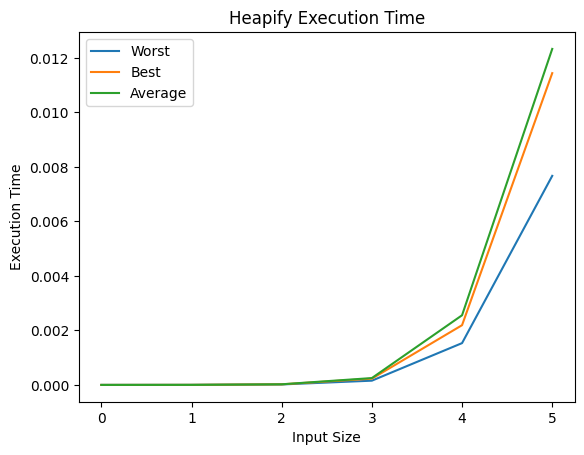

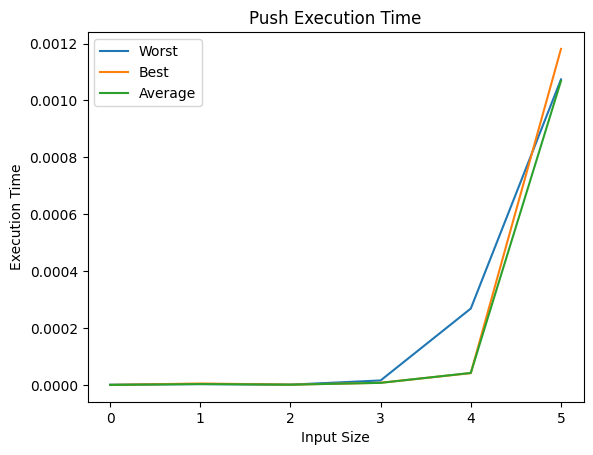

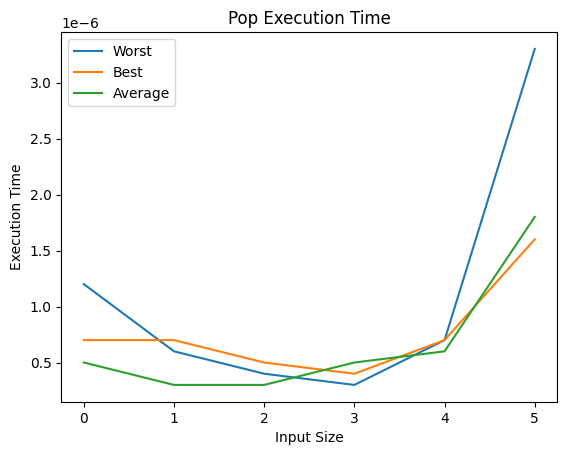

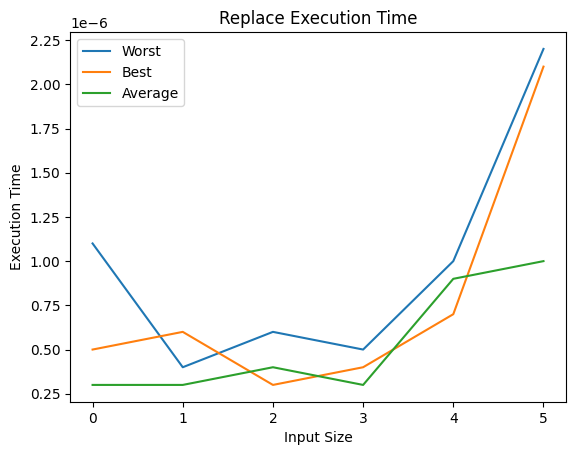

In [24]:
import matplotlib.pyplot as plt

# Plotting heapify_worst, heapify_best, and heapify_avg
#x_axis = [10, 100, 1000, 10000, 100000, 500000]
plt.plot( heapify_worst, label='Worst')
plt.plot( heapify_best, label='Best')
plt.plot( heapify_avg, label='Average')
# Adding labels and title to the plot
plt.xlabel('Input Size')
plt.ylabel('Execution Time')
plt.title('Heapify Execution Time')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

# Plotting heapify_worst, heapify_best, and heapify_avg
plt.plot(push_worst, label='Worst')
plt.plot(push_best, label='Best')
plt.plot(push_avg, label='Average')
# Adding labels and title to the plot
plt.xlabel('Input Size')
plt.ylabel('Execution Time')
plt.title('Push Execution Time')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

# Plotting heapify_worst, heapify_best, and heapify_avg
plt.plot(pop_worst, label='Worst')
plt.plot( pop_best, label='Best')
plt.plot(pop_avg, label='Average')
# Adding labels nd title to the plot
plt.xlabel('Input Size')
plt.ylabel('Execution Time')
plt.title('Pop Execution Time')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

# Plotting heapify_worst, heapify_best, and heapify_avg
plt.plot(rp_worst, label='Worst')
plt.plot(rp_best, label='Best')
plt.plot(rp_avg, label='Average')
# Adding labels and title to the plot
plt.xlabel('Input Size')
plt.ylabel('Execution Time')
plt.title('Replace Execution Time')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()



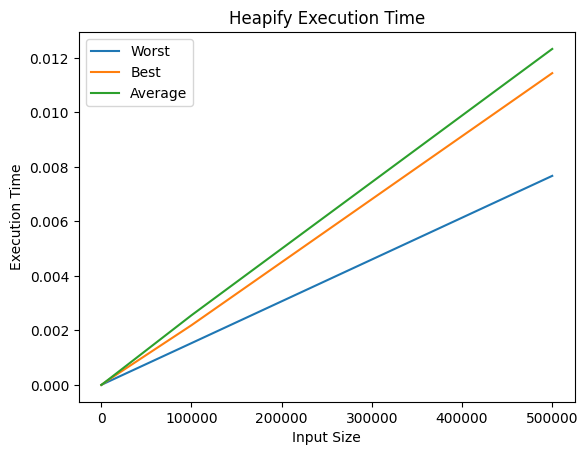

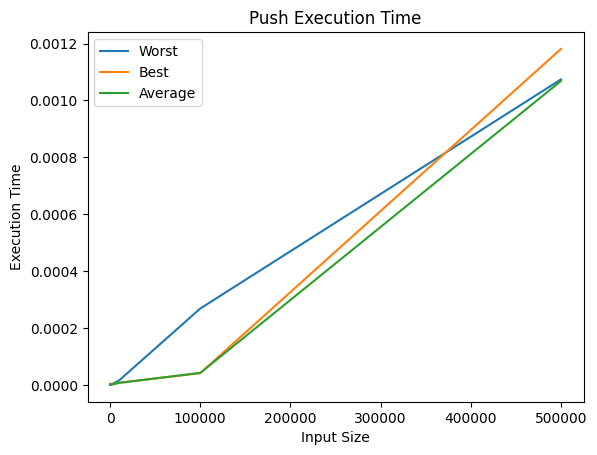

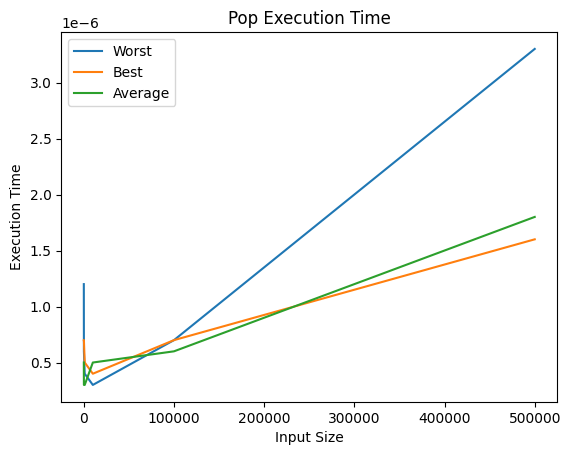

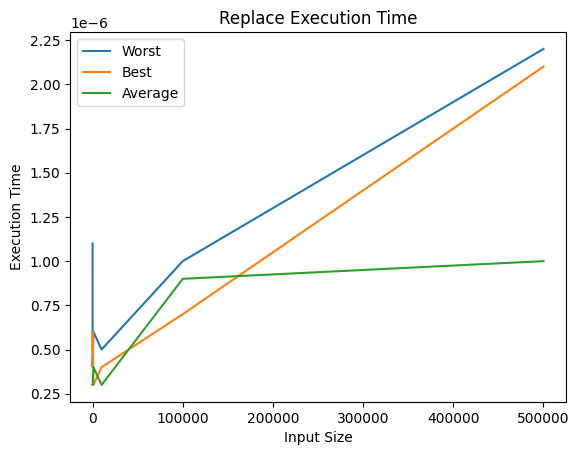

In [25]:
import matplotlib.pyplot as plt

# Plotting heapify_worst, heapify_best, and heapify_avg
x_axis = [10, 100, 1000, 10000, 100000, 500000]
plt.plot(x_axis, heapify_worst, label='Worst')
plt.plot(x_axis, heapify_best, label='Best')
plt.plot(x_axis, heapify_avg, label='Average')
# Adding labels and title to the plot
plt.xlabel('Input Size')
plt.ylabel('Execution Time')
plt.title('Heapify Execution Time')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

# Plotting heapify_worst, heapify_best, and heapify_avg
plt.plot(x_axis, push_worst, label='Worst')
plt.plot(x_axis, push_best, label='Best')
plt.plot(x_axis, push_avg, label='Average')
# Adding labels and title to the plot
plt.xlabel('Input Size')
plt.ylabel('Execution Time')
plt.title('Push Execution Time')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

# Plotting heapify_worst, heapify_best, and heapify_avg
plt.plot(x_axis, pop_worst, label='Worst')
plt.plot(x_axis, pop_best, label='Best')
plt.plot(x_axis, pop_avg, label='Average')
# Adding labels and title to the plot
plt.xlabel('Input Size')
plt.ylabel('Execution Time')
plt.title('Pop Execution Time')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

# Plotting heapify_worst, heapify_best, and heapify_avg
plt.plot(x_axis, rp_worst, label='Worst')
plt.plot(x_axis, rp_best, label='Best')
plt.plot(x_axis, rp_avg, label='Average')
# Adding labels and title to the plot
plt.xlabel('Input Size')
plt.ylabel('Execution Time')
plt.title('Replace Execution Time')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()




## Regressional Time Complexity Analysis

an analysis using the regression techniques from the second homework to estimate the big-O time complexity for each
heapq operation based on the benchmarking results

In [26]:
#lists of times and sizes
sizes = [10,100,1000,10000,100000,500000]

worstPush = [1.000008e-06, 0.000003, 0.000002, 0.000002, 0.000277, 0.001880]
bestPush = [9.000069e-07, 0.000002 ,0.000002 ,0.000002 ,0.000247, 0.001748]
avgPush = [9.000069e-07 ,0.000002 , 0.000002, 0.000002, 0.000316, 0.001757]

worstPop = [1.700013e-06,6.000046e-07,7.000053e-07,7.000053e-07,0.000002,0.000004]
bestPop = [5.000038e-07,6.000046e-07,5.000038e-07,5.000038e-07,0.000002,0.000002]
avgPop = [7.000053e-07,7.000053e-07,5.000038e-07,5.000038e-07,0.000002,0.000002]

worstHeapify = [0.000001,0.000003,0.000019,0.000289,0.002647,0.013580]
bestHeapify = [0.000001,0.000003,0.000024,0.000233,0.003432, 0.012608]
avgHeapify = [0.000001,0.000003,0.000024,0.000258,0.002475,0.012488]

worstReplace = [1.200009e-06,6.000046e-07,4.000030e-07,8.000061e-07,9.000069e-07,2.600020e-06]
beatReplace = [7.000053e-07,6.000046e-07,4.000030e-07,5.000038e-07,7.000053e-07,8.999486e-07]
avgReplace = [4.999456e-07,4.000030e-07,4.000030e-07,4.999456e-07,8.000061e-07,2.099958e-06]

In [27]:
#Slopes from linear regression on each case and heapq operation
import numpy as np
from scipy.stats import linregress
#PUSH
m,b, _, _, _ = linregress(np.log(sizes),np.log(worstPush))
print('slope for worst case push: ' + str(m))

m,b, _, _, _ = linregress(np.log(sizes),np.log(bestPush))
print('slope for best case push: ' + str(m))

m,b, _, _, _ = linregress(np.log(sizes),np.log(avgPush))
print('slope for average case push: ' + str(m))
print()

#POP
m,b, _, _, _ = linregress(np.log(sizes),np.log(worstPop))
print('slope for worst case pop: ' + str(m))

m,b, _, _, _ = linregress(np.log(sizes),np.log(bestPop))
print('slope for best case pop: ' + str(m))

m,b, _, _, _ = linregress(np.log(sizes),np.log(avgPop))
print('slope for avarage case pop: ' + str(m))
print()

#HEAPIFY
m,b, _, _, _ = linregress(np.log(sizes),np.log(worstHeapify))
print('slope for worst case heapify: ' + str(m))

m,b, _, _, _ = linregress(np.log(sizes),np.log(bestHeapify))
print('slope for best case heapify: ' + str(m))

m,b, _, _, _ = linregress(np.log(sizes),np.log(avgHeapify))
print('slope for average case heapify: ' + str(m))
print()

#REPLACE
m,b, _, _, _ = linregress(np.log(sizes),np.log(worstReplace))
print('slope for worst case replace: ' + str(m))

m,b, _, _, _ = linregress(np.log(sizes),np.log(beatReplace))
print('slope for best case replace: ' + str(m))

m,b, _, _, _ = linregress(np.log(sizes),np.log(avgReplace))
print('slope for average case replace: ' + str(m))


slope for worst case push: 0.6526772182272188
slope for best case push: 0.6663121739725012
slope for average case push: 0.6769447509420915

slope for worst case pop: 0.09721575025093984
slope for best case pop: 0.13519311079540514
slope for avarage case pop: 0.10687702471184242

slope for worst case heapify: 0.9139982318452767
slope for best case heapify: 0.9143220298364801
slope for average case heapify: 0.9015612879123489

slope for worst case replace: 0.06942914717055002
slope for best case replace: 0.023111446416281874
slope for average case replace: 0.11837701165232745
